# Part 4

## Visualize after batch correstion

### load data

In [1]:
library(ggplot2)
library(data.table) #to read gz file

Loading required package: ggplot2

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, r

In [2]:
# load cell_relabelling 

cell_relabelling <- read.csv(file = "additional_input_files/cell_relabelling.csv"
                             ,sep = ";"
)
rownames(cell_relabelling) <- cell_relabelling$cell_type_original
print(str(cell_relabelling))

In [4]:
# # load counts

counts_corrected <- fread("counts_corr.csv.gz", header = TRUE)
print(head(str(counts_corrected)))
print(head(rownames(counts_corrected)))
rownames(counts_corrected) <- counts_corrected$gene_symbol
print(head(rownames(counts_corrected)))
counts_corrected <- counts_corrected[,-1]
counts_corrected <- as.data.frame(counts_corrected)
head(colnames(counts_corrected))

In [13]:
# load cell annotation

anno_cells <- read.table("anno_cells_corr.txt"
                         ,sep = "\t"
                         ,row.names = 1
                         ,header = TRUE
                         )
print(str(anno_cells))

'data.frame':	74583 obs. of  36 variables:
 $ cell_ID.1                     : chr  "AML1012-D0_AAAAAGTTACGT" "AML1012-D0_AAAACACCAATC" "AML1012-D0_AAAATAGCCTTT" "AML1012-D0_AAACATTAAACG" ...
 $ cell_type_original            : chr  "GMP" "GMP-like" "Prog-like" "ProMono-like" ...
 $ sample_ID                     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
 $ malignant                     : chr  "False" "True" "True" "True" ...
 $ patient_ID                    : chr  "AML1012" "AML1012" "AML1012" "AML1012" ...
 $ dataset                       : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                        : chr  "F" "F" "F" "F" ...
 $ age                           : int  32 32 32 32 32 32 32 32 32 32 ...
 $ health_status                 : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control               : chr  "case" "case" "case" "case" ...
 $ day                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cell_type                     : chr

In [14]:
# load sample annotation

anno_samples <- read.table("anno_samples_corr.txt"
                         ,sep = "\t"
                         ,row.names = 1
                         ,header = TRUE
)
print(str(anno_samples))

'data.frame':	33 obs. of  15 variables:
 $ sample_ID                    : chr  "AML1012-D0" "AML210A-D0" "AML328-D0" "AML419A-D0" ...
 $ patient_ID                   : chr  "AML1012" "AML210A" "AML328" "AML419A" ...
 $ dataset                      : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                       : chr  "F" "M" "F" "F" ...
 $ age                          : int  32 67 74 54 58 70 26 57 42 52 ...
 $ health_status                : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control              : chr  "case" "case" "case" "case" ...
 $ day                          : num  0 0 0 0 0 0 0 0 0 NA ...
 $ nr_cells_raw                 : int  1136 748 1094 1189 485 2328 1586 933 3813 108 ...
 $ nr_cells_cf                  : int  951 640 965 1091 399 2196 1410 869 3574 93 ...
 $ nr_cells_cf_ctf              : int  946 603 909 1086 388 2186 1407 868 3504 93 ...
 $ total_counts_raw_cf_ctf_gf   : int  2060373 1530216 2367765 2783381 968844 5957569 4255900 1823

In [15]:
# load gene annotation

anno_genes <- read.table("anno_genes_corr.txt"
                           ,sep = "\t"
                           ,row.names = 1
                           ,header = TRUE
)
print(str(anno_genes))

'data.frame':	12485 obs. of  11 variables:
 $ gene_symbol.1                        : chr  "A1BG" "A1BG-AS1" "A2M-AS1" "A4GALT" ...
 $ is_in_LR_database                    : chr  "False" "False" "False" "False" ...
 $ isLigand                             : chr  "False" "False" "False" "False" ...
 $ isReceptor                           : chr  "False" "False" "False" "False" ...
 $ sum_pseudobulkCellType_expr          : num  40.76 1.67 2.74 10.86 18.2 ...
 $ sum_pseudobulkCellType_expr_threshold: int  1 1 1 1 1 1 1 1 1 1 ...
 $ sum_pseudobulkCellType_expr_filter   : chr  "True" "True" "True" "True" ...
 $ highly_variable                      : chr  "False" "False" "True" "False" ...
 $ means                                : num  0.10749 0.00645 0.01976 0.00989 0.02429 ...
 $ dispersions                          : num  -3.28 -6.24 -2.89 -2.39 -4.12 ...
 $ dispersions_norm                     : num  0.339 -2.101 0.657 1.069 -0.351 ...
NULL


In [16]:
# variables ####
# color scheme for celltypes
color_celltype <- cell_relabelling$cell_type_color_hex[!duplicated(cell_relabelling$cell_type)]
names(color_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

### process data

In [17]:
# check if booleans are stored correctly in teh anno_genes file
if(class(anno_genes$isLigand) == "character"){
  anno_genes$isLigand <- as.logical(toupper(anno_genes$isLigand))
}

if(class(anno_genes$isReceptor) == "character"){
  anno_genes$isReceptor <- as.logical(toupper(anno_genes$isReceptor))
}

### visualize

In [18]:
#construct pseudo bulks for cell types 

cell_type_IDs <- unique(anno_cells$cell_type_ID)
  counts_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(counts_corrected)
                                                    ,ncol = length(cell_type_IDs)
  )
  )

i <- 1
for(cell_type_ID in cell_type_IDs){
#     print(cell_type_ID)

    idx_cell_type_ID <- anno_cells$cell_type_ID == cell_type_ID
    
    if(sum(idx_cell_type_ID)==0){
        counts_pseudobulkCellType[,i] <- 0
    } else if(sum(idx_cell_type_ID)==1){
        counts_pseudobulkCellType[,i] <- counts_corrected[,idx_cell_type_ID]
    } else {
        counts_pseudobulkCellType[,i] <- rowMeans(counts_corrected[,idx_cell_type_ID])
    }
        i <- i+1
    }

colnames(counts_pseudobulkCellType) <- cell_type_IDs
rownames(counts_pseudobulkCellType) <- rownames(counts_corrected)
print(str(counts_pseudobulkCellType))

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  3.03 3.18 3.11 3.07 3.08 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


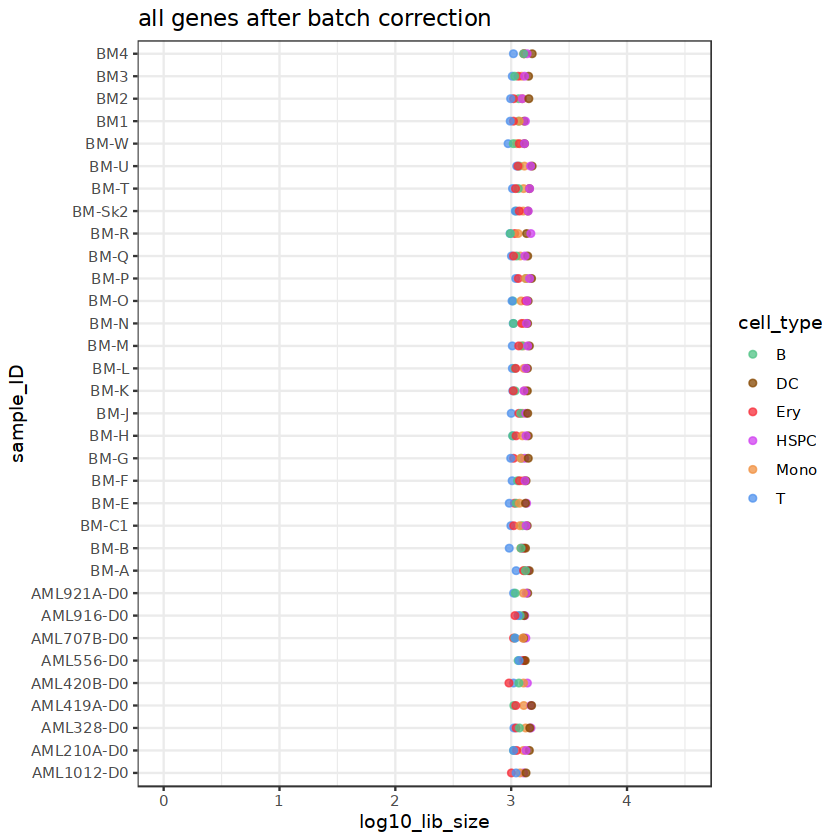

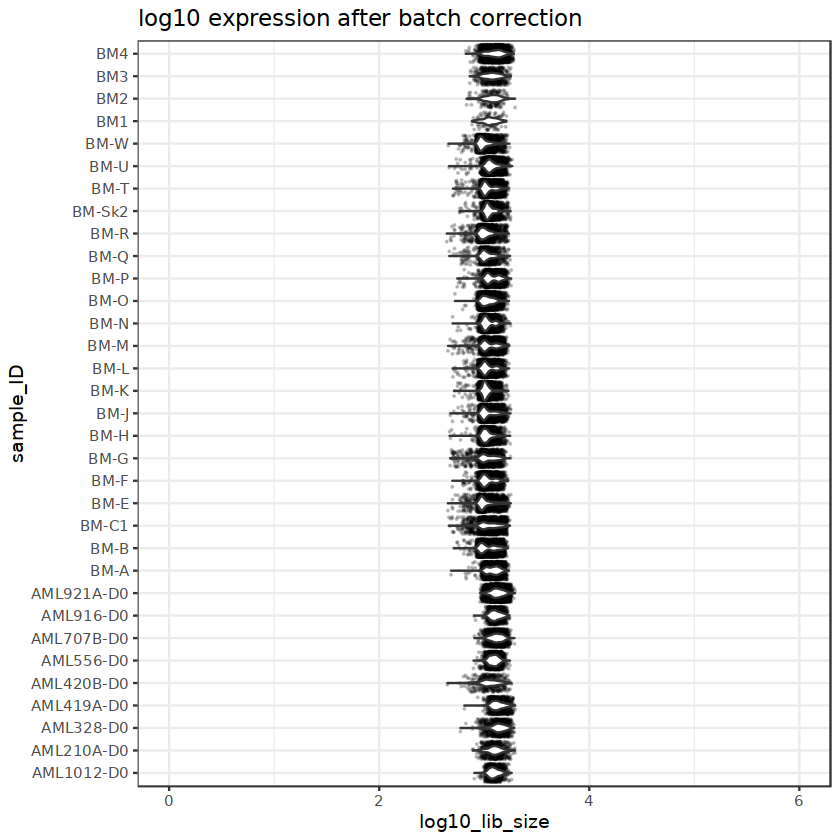

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  1.68 1.84 1.72 1.84 1.76 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


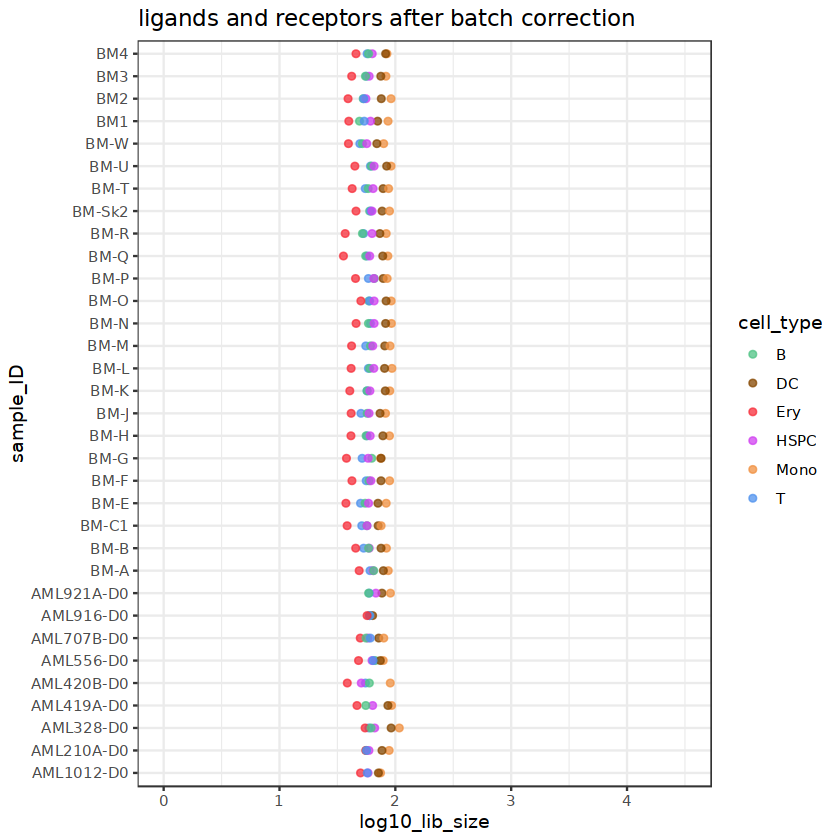

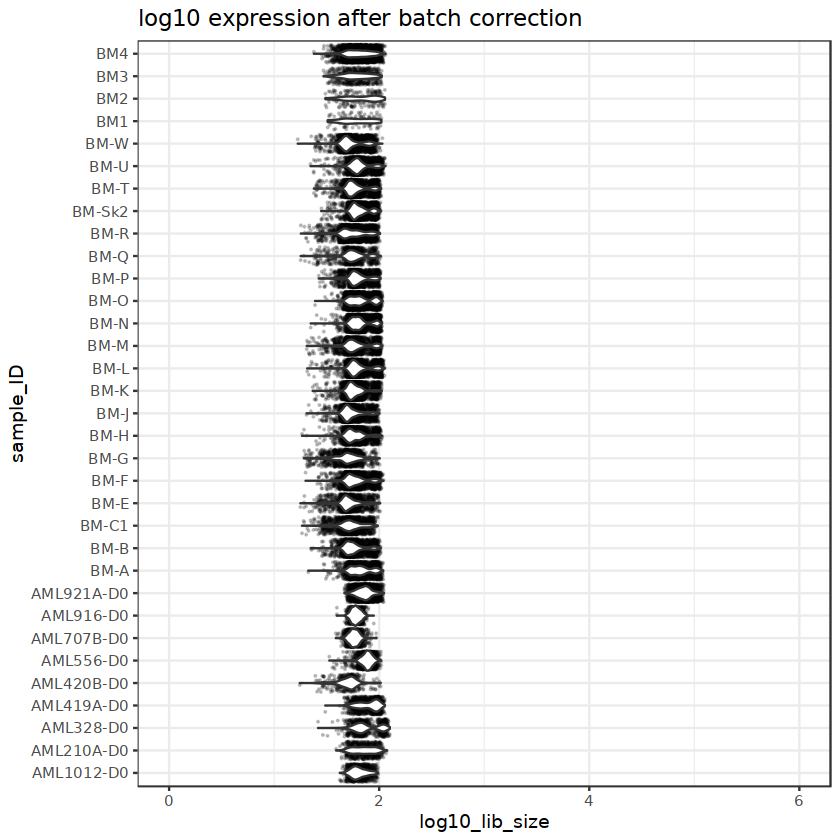

In [23]:
# visualize expression in pseudo sorted bulk

  for(genes_type in c("all genes"
                      ,"ligands and receptors")){
    ifelse(genes_type == "all genes"
           ,idx_genes <- rep(T,nrow(anno_genes))
           ,idx_genes <- anno_genes$isLigand | anno_genes$isReceptor
    )

    my_sampes <- sub("_.*", "", colnames(counts_pseudobulkCellType))
    df <- data.frame(log10_lib_size = log10(colSums(counts_pseudobulkCellType[idx_genes,]) +1)
                     ,sample_ID = sub(".*_"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
                     ,cell_type = sub("_.*"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
    )

    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                      ,color = cell_type
                 )
    ) +
      geom_jitter(height = NULL
                  ,width = 0
                  ,alpha = 0.75) +
      ggtitle(paste(genes_type
                    ,"after batch correction")) +
      coord_flip() +
      ylim(c(0,4.5)) +
      scale_color_manual(values = color_celltype)+
      theme_bw()
    )

    # visualize expression after gene filter
    print("visualize expression after gene filter")
    df <- data.frame(log10_lib_size = log10(colSums(counts_corrected[idx_genes,]) +1)
                     ,sample_ID = anno_cells$sample_ID
    )
    print(str(df))

    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                 )
    ) +
      geom_jitter(height = NULL
                  ,size = 0.1
                  ,alpha = 0.2) +
      geom_violin() +
      ggtitle("log10 expression after batch correction") +
      coord_flip() +
      ylim(c(0,6))+
      theme_bw()
    )
    rm(df)

  }
